# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import operator
import random
import string
from matplotlib.ticker import PercentFormatter

#Data visualization

##Training data

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/NLP/data/train.csv")
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
a = np.array(df_train[['toxic', 'severe_toxic',	'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=0))
a = a/len(df_train)*100

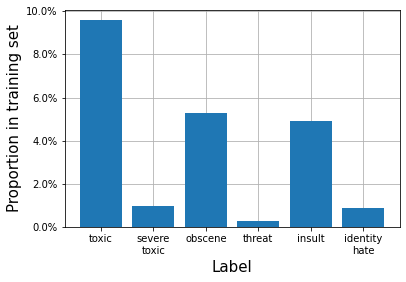

In [ ]:
plt.bar(range(1,len(a)+1),a,zorder=3)
plt.xticks(range(1,len(a)+1),['toxic', 'severe\ntoxic',	'obscene', 'threat', 'insult', 'identity\nhate'])
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Label',fontsize=15)
plt.ylabel('Proportion in training set',fontsize=15)
plt.grid(True,zorder=1)
plt.savefig('training_data',bbox_inches='tight')

##Test data

In [ ]:
df_test_comments = pd.read_csv("/content/drive/MyDrive/NLP/data/test.csv")
df_test_comments.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
df_test_labels = pd.read_csv("/content/drive/MyDrive/NLP/data/test_labels.csv")
df_test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [ ]:
df_test = pd.merge(df_test_comments,df_test_labels,on='id')
df_test = df_test[df_test['toxic']>-1]
df_test = df_test.reset_index(drop=True)
df_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [ ]:
a = np.array(df_test[['toxic', 'severe_toxic',	'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=0))
a = a/len(df_test)*100

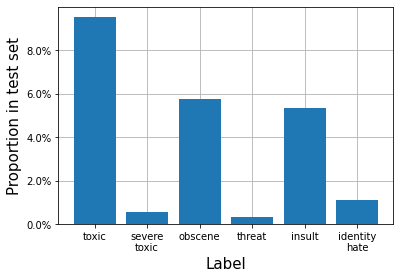

In [ ]:
plt.bar(range(1,len(a)+1),a,zorder=3)
plt.xticks(range(1,len(a)+1),['toxic', 'severe\ntoxic',	'obscene', 'threat', 'insult', 'identity\nhate'])
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Label',fontsize=15)
plt.ylabel('Proportion in test set',fontsize=15)
plt.grid(True,zorder=1)
plt.savefig('test_data',bbox_inches='tight')

# Clean the data

In [ ]:
# function cleaning a list of comment
def clean(data):

  # Remove URLs
  data['comment_text'] = data['comment_text'].apply(lambda x: re.sub(r'http\S+', '', x))

  # Remove punctuation
  data['comment_text'] = data['comment_text'].apply(lambda x: re.sub('[%s]' % re.escape(r'!"#$%&\'()*+,-./:;<·=>?@[\]^_`{|}~'), '' , x))

  # Lower case the comments
  data['comment_text'] = data['comment_text'].apply(lambda x: x.lower())

  # Remove digits
  data['comment_text'] = data['comment_text'].apply(lambda x: re.sub('[%s]' % re.escape('0123456789'), '' , x))

  # Remove \n
  data['comment_text'] = data['comment_text'].apply(lambda x: re.sub('\n', ' ' , x))

  # Remove mutiple spaces
  data['comment_text'] = data['comment_text'].apply(lambda x: re.sub('\s+', ' ' , x))

  # Remove starting\ending spaces
  data['comment_text'] = data['comment_text'].apply(lambda x: re.sub('^ | $', '' , x))

  # Remove void text after cleaning
  data['comment_text'].replace('', 'a', inplace=True)
  
  return data

In [ ]:
# example of comment
n_train = 71802
n_test = 1642

print('Example comment from training :\n'+df_train['comment_text'][n_train])
print()
print('*******************************')
print()
print('Example comment from test : \n'+df_test['comment_text'][n_test])

Example comment from training :
Citation needed  

Citation needed - but I cannot work out how to do it.

http://www2.anyoneforpimms.com/winterpages/winter_history.html

*******************************

Example comment from test : 
OI ! you with the rapid fire delete button. Leave Derain 
 pix alone... They are purdy.


In [ ]:
# clean text
df_train = clean(df_train)
df_test = clean(df_test)


print('Example comment from training :\n'+df_train['comment_text'][n_train])
print()
print('*******************************')
print()
print('Example comment from test : \n'+df_test['comment_text'][n_test])

Example comment from training :
citation needed citation needed but i cannot work out how to do it

*******************************

Example comment from test : 
oi you with the rapid fire delete button leave derain pix alone they are purdy


#Save clean datasets

In [ ]:
df_train.to_csv('/content/drive/MyDrive/NLP/bert/data/train_clean.csv')
df_test.to_csv('/content/drive/MyDrive/NLP/bert/data/test_clean.csv')